# Principal Component Analysis with Cancer Data

In [433]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [434]:
bcancer = pd.read_csv("breast-cancer-wisconsin-data.csv")
bcancer.tail(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [218]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [435]:
print("The total rows and columns in breast cancer dataset is ", bcancer.shape)
bcancer.info()
bcancer.describe().transpose()

The total rows and columns in breast cancer dataset is  (699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [436]:
# We could see "?" values in column, this should be removed from data set
print("The total NA values in columns is " , sum([True for idx,row in bcancer.iterrows() if any(row.isna())]))
# Check for missing value in any other column

The total NA values in columns is  0


In [437]:
# No missing values found. So let us try to remove ? from bare nuclei column
char2find = "?"

# Get count of rows having ?

print(bcancer["Bare Nuclei"].value_counts())
print("There are 16 rows which has the ? embedded in it.")

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64
There are 16 rows which has the ? embedded in it.


In [440]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

#bcancer["Bare Nuclei"].replace("?", np.NaN, inplace = True)

bcancer["Bare Nuclei"].replace("?", 4, inplace = True)

bcancer["Bare Nuclei"] = bcancer["Bare Nuclei"].apply(pd.to_numeric)

print(bcancer["Bare Nuclei"].value_counts())

1     402
10    132
4      35
5      30
2      30
3      28
8      21
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


In [441]:
#bcancer["Bare Nuclei"] = bcancer["Bare Nuclei"].apply(pd.to_numeric)
#print(bcancer["Bare Nuclei"].mode())
#bcancer["Bare Nuclei"].replace(np.nan,bcancer["Bare Nuclei"].mode(), inplace = True)

print(bcancer["Bare Nuclei"].value_counts())
bcancer.info()

1     402
10    132
4      35
5      30
2      30
3      28
8      21
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


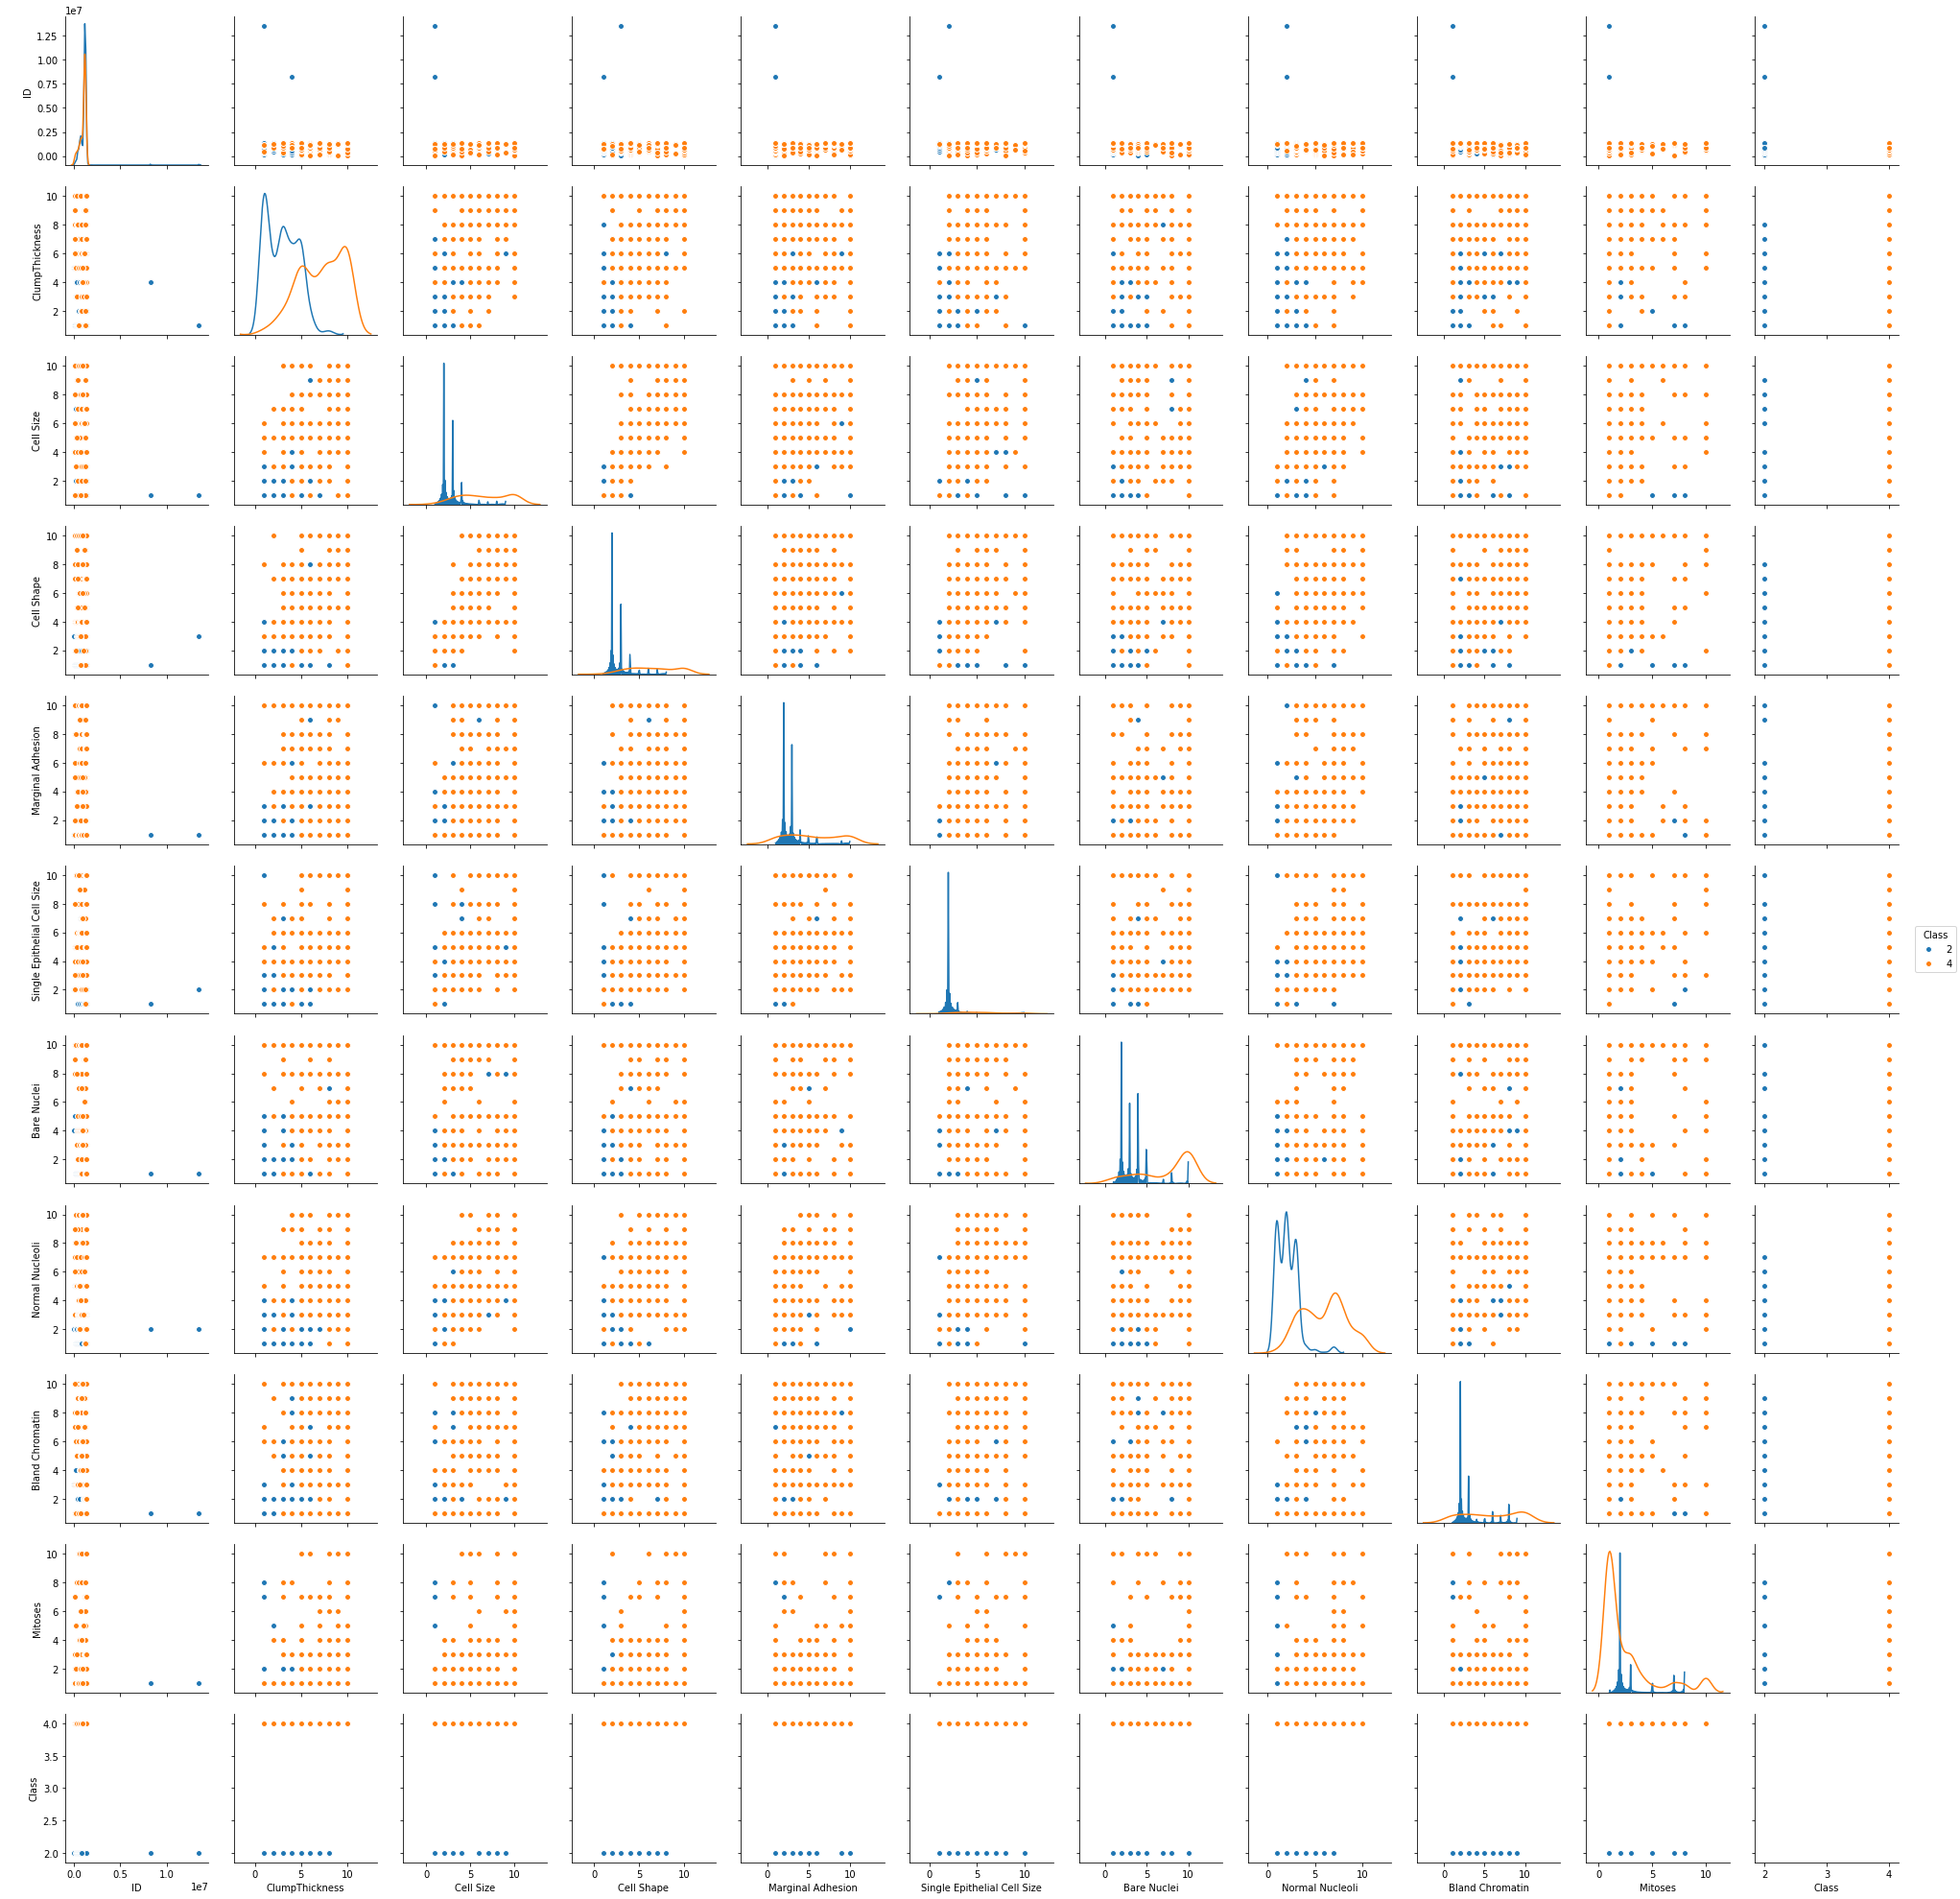

In [443]:
# Check for correlation of variable

sns.pairplot(bcancer,kind="scatter", diag_kind='kde', hue = "Class")

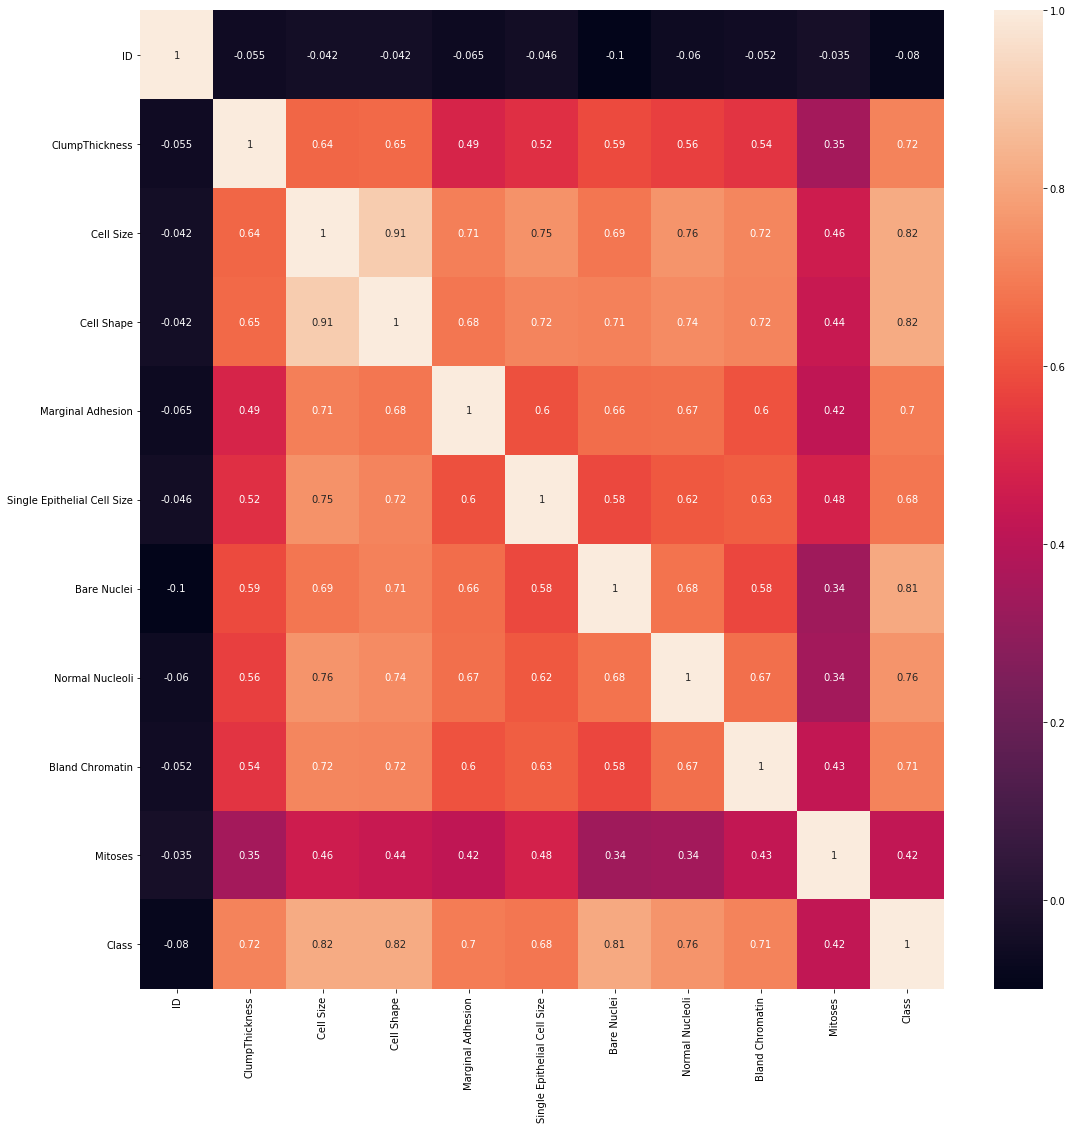

In [444]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

import matplotlib.pyplot as mplot
import seaborn as sns

mplot.figure(figsize=(18 , 18))

bcancer_corr = bcancer.corr()
sns.heatmap(bcancer_corr, xticklabels = bcancer_corr.columns.values, yticklabels = bcancer_corr.columns.values, annot = True);


In [225]:
#Let us check for pair plots

In [226]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [227]:
# We could see most of the outliers are now removed.

In [445]:
print(bcancer.duplicated().value_counts())

False    691
True       8
dtype: int64


In [448]:
bcancer.drop_duplicates(inplace = True)
print(bcancer.count())

ID                             691
ClumpThickness                 691
Cell Size                      691
Cell Shape                     691
Marginal Adhesion              691
Single Epithelial Cell Size    691
Bare Nuclei                    691
Normal Nucleoli                691
Bland Chromatin                691
Mitoses                        691
Class                          691
dtype: int64


In [449]:
bcancer = bcancer.drop(["ID"], axis = 1)

Checking for the outliers to be listed


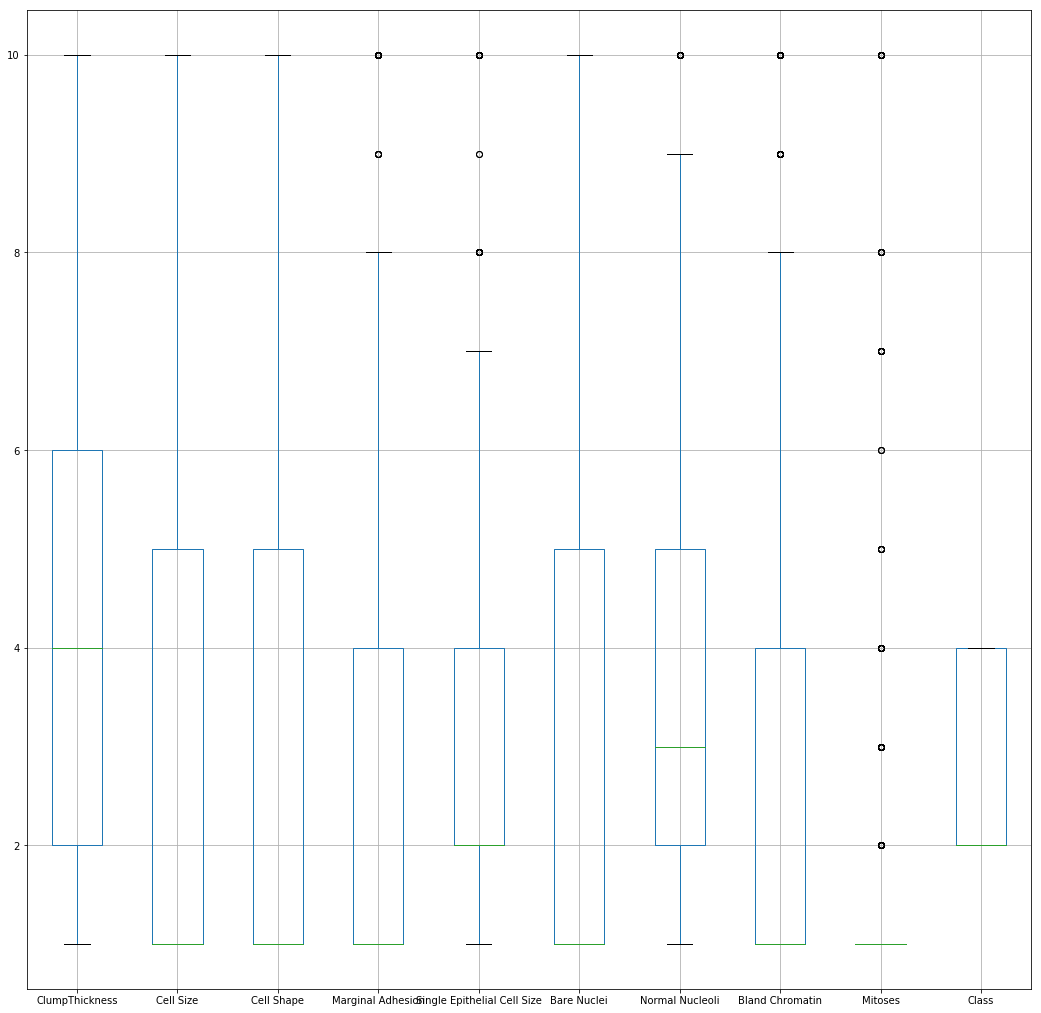

In [450]:
# Checking for the outliers to be listed 

print("Checking for the outliers to be listed")
mplot.figure(figsize=(18 , 18))
bcancer.boxplot()

In [454]:
print("The list indicates the Benign and Malignant cases in the outlier.Whether to remove this or not is a business decision.")
pd.crosstab(bcancer["Single Epithelial Cell Size"],bcancer["Class"])

The list indicates the Benign and Malignant cases in the outlier.Whether to remove this or not is a business decision.


Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [456]:
# Treating the outliers with replacement with the 75% quartile for outliers above the maximum.


bcancer["Marginal Adhesion"] = np.where(bcancer["Marginal Adhesion"] > 8 , 4, bcancer["Marginal Adhesion"])

bcancer["Single Epithelial Cell Size"] = np.where(bcancer["Single Epithelial Cell Size"] > 7 , 4, bcancer["Single Epithelial Cell Size"])

bcancer["Normal Nucleoli"] = np.where(bcancer["Normal Nucleoli"] > 9 , 5, bcancer["Normal Nucleoli"])

bcancer["Bland Chromatin"] = np.where(bcancer["Bland Chromatin"] > 8 , 4, bcancer["Bland Chromatin"])

bcancer["Mitoses"] = np.where(bcancer["Mitoses"] > 1 , 1, bcancer["Mitoses"])



Checking if the outliers have been removed


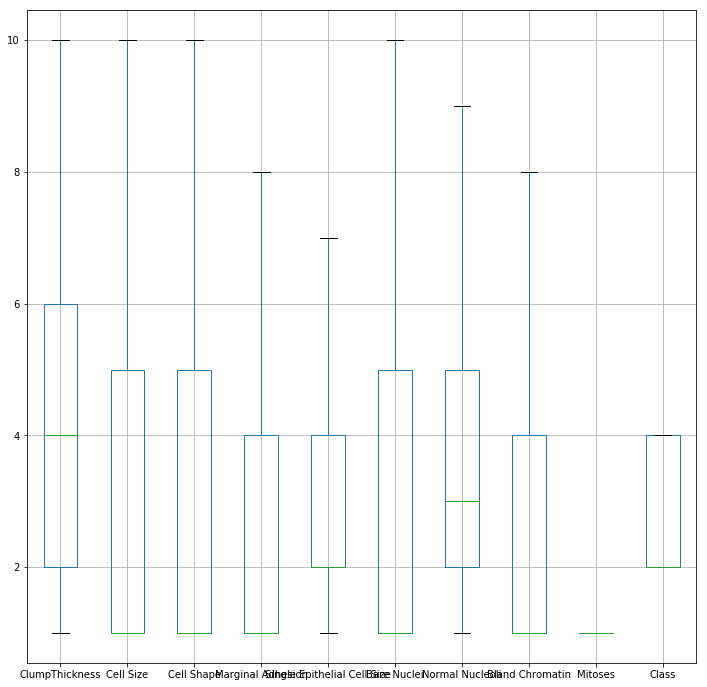

In [457]:
# Checking for the outliers to be listed 

print("Checking if the outliers have been removed")
mplot.figure(figsize=(12 , 12))
bcancer.boxplot()

# Q6 Create a covariance matrix for identifying Principal components

In [459]:
# PCA
# Step 1 - Create covariance matrix

In [462]:
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

print(bcancer.iloc[:,5].value_counts())

y = bcancer["Class"]
X = bcancer.drop('Class',axis=1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

1     397
10    130
4      35
5      30
2      30
3      28
8      20
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


In [463]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#print(X_train)
X_train_std = sc.fit_transform(X)  # scale training and test data independently to prevent data leaks
#X_test_std = sc.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [464]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.49303803 0.53423144 0.58767821
  0.56549929 0.51600742 0.        ]
 [0.64427196 1.00144928 0.90673173 0.69334195 0.73760001 0.68510031
  0.72263552 0.65762527 0.        ]
 [0.65469961 0.90673173 1.00144928 0.66132372 0.71447771 0.70710418
  0.70382932 0.63973996 0.        ]
 [0.49303803 0.69334195 0.66132372 1.00144928 0.64424807 0.64498931
  0.66024086 0.58319823 0.        ]
 [0.53423144 0.73760001 0.71447771 0.64424807 1.00144928 0.62060219
  0.62846999 0.62033825 0.        ]
 [0.58767821 0.68510031 0.70710418 0.64498931 0.62060219 1.00144928
  0.68564224 0.59155277 0.        ]
 [0.56549929 0.72263552 0.70382932 0.66024086 0.62846999 0.68564224
  1.00144928 0.61881441 0.        ]
 [0.51600742 0.65762527 0.63973996 0.58319823 0.62033825 0.59155277
  0.61881441 1.00144928 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [238]:
# Step 2- Get eigen values and eigen vector

In [465]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31587738 -0.00904643  0.82697169  0.06348549  0.12244094 -0.15173882
   0.41325934  0.05854326  0.        ]
 [ 0.38789938 -0.72399307  0.05426666  0.01547347 -0.37081245  0.27081611
  -0.2459538   0.22549346  0.        ]
 [ 0.3841074   0.68023005  0.13004286 -0.01081253 -0.35059549  0.35803634
  -0.32118008  0.13585534  0.        ]
 [ 0.34292874  0.05522666 -0.41987479 -0.38569617  0.04058162  0.20593794
   0.66531034  0.25999686  0.        ]
 [ 0.35120476  0.03622985 -0.2213772   0.19460599 -0.51028695 -0.53282156
   0.16688572 -0.46510303  0.        ]
 [ 0.3521277  -0.08235907  0.02570149 -0.37202159  0.40226252  0.23234984
  -0.20160202 -0.68827137  0.        ]
 [ 0.35658311  0.04044607 -0.11124722 -0.24266272  0.33440904 -0.60555316
  -0.39131606  0.41024282  0.        ]
 [ 0.33185346  0.01605603 -0.24067111  0.78210931  0.43463199  0.16868199
   0.03614531  0.03650842  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [466]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 69.31921561  76.12634124  81.62927957  86.86492052  91.12920481
  95.16222912  98.86716896 100.         100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [467]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance:",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.72151664 0.08256523 0.06948222]
[[ 0.34767331  0.4509091   0.43908107  0.23894917  0.17612672  0.50729703
   0.28918281  0.23220199 -0.        ]
 [ 0.34649268  0.35790099  0.30005124 -0.04441717  0.05366394 -0.80870057
  -0.03850468  0.03856205 -0.        ]
 [ 0.86374894 -0.31706179 -0.24078232 -0.19202783 -0.10804568  0.14394407
  -0.11597788 -0.11275704  0.        ]]


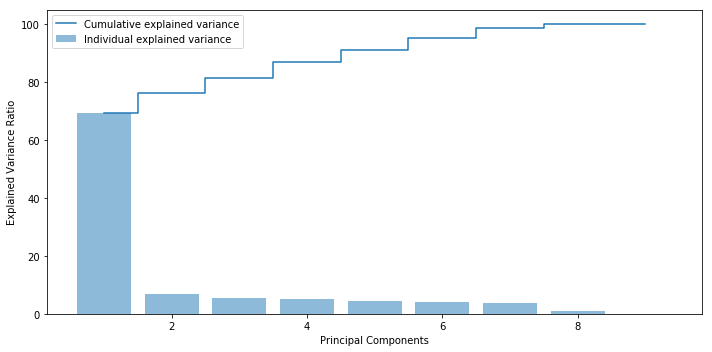

In [468]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q10 Find correlation between components and features

In [470]:
bcancer_comp = pd.DataFrame(pca.components_,columns = list(X))

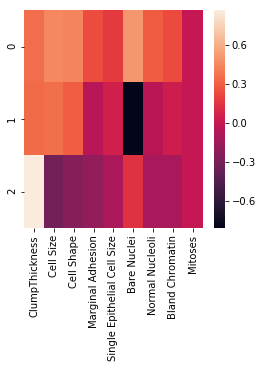

In [474]:

mplot.figure(figsize=(4,4))
sns.heatmap(bcancer_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [475]:
jokes = pd.read_csv("jokes.csv")
jokes.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [476]:
ratings = jokes.iloc[0:200,1:101]

#print(ratings.info())

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [477]:
ratings = ratings.replace(99.0,0)

In [478]:
ratings.head(5)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [479]:
rate_mean = ratings.agg(['mean'])

In [480]:
print("The mean ratings of the jokes across all user are displayed below")
rate_mean

The mean ratings of the jokes across all user are displayed below


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
mean,0.53005,0.5939,0.23765,-0.701,-0.0379,1.32005,0.1715,-0.0853,0.0167,0.8947,...,0.5626,0.1751,1.15585,0.6379,0.58165,0.41755,0.755,0.0937,0.135,0.5244


In [481]:
rate_mean_transpose = rate_mean.transpose()
print("The Joke with the highest mean rating is ") 

rate_mean_transpose.sort_values(by ="mean" ,ascending = False).head(1)

The Joke with the highest mean rating is 


,mean
Joke50,4.0554


In [483]:
print("The Top 10 Jokes based on mean ratings across users are displayed below")
rate_mean_transpose.sort_values(by ="mean" ,ascending = False).head(10)

The Top 10 Jokes based on mean ratings across users are displayed below


,mean
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
Joke27,3.05240
Joke62,2.86185
Joke49,2.85000
Joke32,2.77955
Joke31,2.65710
